## Feed Forward Neural Network for MNIST Classification
### Numbers dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import tensorflow.keras as keras

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_path = "mnist_test.csv"
test_path = "mnist_test.csv"

In [6]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [16]:
x_test, y_test = test_data.drop('label', axis=1), test_data.label.values

In [8]:
x_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_train, y_train = train_data.drop(["label"], axis=1), train_data.label.values

In [18]:
x_train = x_train * 1.0/255

In [19]:
x_test = x_test * 1.0/255

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [13]:
model = keras.Sequential([
    keras.layers.Input((784,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ]
)

In [14]:
model.compile('sgd', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

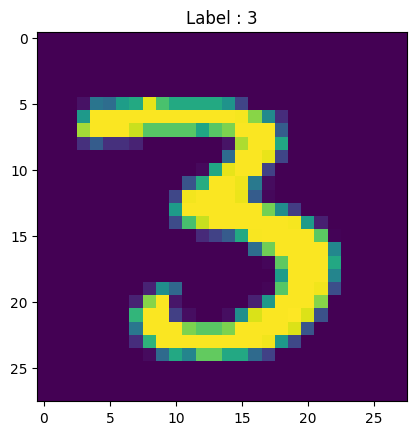

In [13]:
plt.title(f"Label : {y_train[12]}")
plt.imshow(x_train[12])

In [20]:
training_log = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.7477 - loss: 0.9914 - val_accuracy: 0.9048 - val_loss: 0.3487
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9032 - loss: 0.3521 - val_accuracy: 0.9215 - val_loss: 0.2852
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9193 - loss: 0.2917 - val_accuracy: 0.9285 - val_loss: 0.2536
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9293 - loss: 0.2527 - val_accuracy: 0.9364 - val_loss: 0.2310
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9363 - loss: 0.2310 - val_accuracy: 0.9395 - val_loss: 0.2131
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9411 - loss: 0.2126 - val_accuracy: 0.9452 - val_loss: 0.1948
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9455 - loss: 0.1951 - val_accuracy: 0.9488 - val_loss: 0.1819
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9479 - loss: 0.1837 -

In [21]:
test_accuracy, test_loss = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1822


In [29]:
x_train = x_train.to_numpy().reshape(x_train.shape[0], 28, 28)
x_test = x_test.to_numpy().reshape(x_test.shape[0], 28, 28)

In [35]:
def softmax_to_int(arr):
    arr = arr[0]
    for a in range(0,10):
        if arr[a] > 0.5:  # Add a threshold if needed, e.g., 0.5
            return a
    return -1

In [30]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [37]:
softmax_to_int(model.predict(x_test[1].reshape(1,784)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


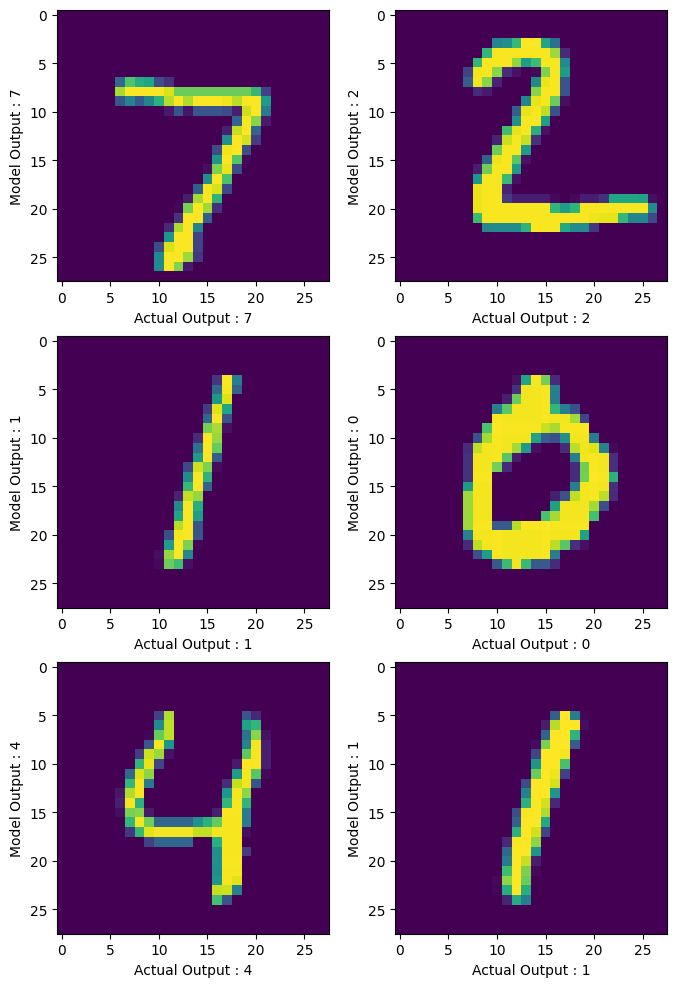

In [38]:
plt.figure(figsize=(8,12))
for x in range(6):
    plt.subplot(3,2,x+1)
    plt.xlabel(f"Actual Output : {y_test[x]}")
    plt.ylabel(f"Model Output : {softmax_to_int(model.predict(x_test[x].reshape(1,784)))}")
    plt.imshow(x_test[x])
    

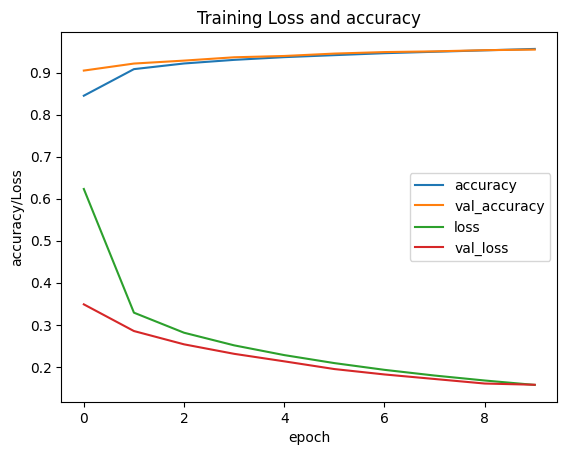

In [39]:
plt.title("Model Report")
plt.plot(training_log.history['accuracy'])
plt.plot(training_log.history['val_accuracy'])
plt.plot(training_log.history['loss'])
plt.plot(training_log.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()